In [1]:
from google.colab import drive
drive.mount('/content/drive')

workdir = "/content/drive/MyDrive/Colab Notebooks/TG/src"

# DEFININDO O DIRETÓRIO ATUAL COMO DIRETÓRIO DE REFERÊNCIA

import os
os.chdir(workdir)
os.getcwd()

Mounted at /content/drive


'/content/drive/MyDrive/Colab Notebooks/TG/src'

In [2]:
!pip install pandas seaborn plotly ydata_profiling folium sidetable

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.5/357.5 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.8/395.8 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 28.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=db741702bc1efff73b135869e6d4f3af63a00f3b21d1bdb1fbc6831a8dc0f99b
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
   

# IMPORTANDO AS BIBLIOTECAS

In [3]:
import datetime
import os
from pathlib import Path
from inspect import stack

import pandas as pd
import sidetable
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from ydata_profiling import ProfileReport

# DEFININDO OPÇÕES GLOBAIS

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [6]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# FUNÇÕES ÚTEIS

In [7]:
def get_files_directory(path_dir, specific_type=None):

    """

        FUNÇÃO PARA OBTER ARQUIVOS DE UM DIRETÓRIO.

        É POSSÍVEL ENVIAR UM FORMATO ESPECÍFICO PARA
        FILTRO DO FORMATO DE ARQUIVO DESEJADO.
        EX: OBTER APENAS XLSX

        # Arguments
            path_dir                   - Required : Diretório analisado (String)
            specific_type              - Optional : Lista com os formatos desejados (List)

        # Returns
            list_files                 - Required : Arquivos do diretório (List)

    """

    # INICIANDO A VARIÁVEL QUE ARMAZENARÁ TODOS OS ARQUIVOS DO DIRETÓRIO
    list_files = []

    # OBTENDO TODOS OS ARQUIVOS
    try:

        # VERIFICANDO SE É DIRETÓRIO
        if os.path.isdir(path_dir):

            # OBTENDO TODOS OS ARQUIVOS EXISTENTES NO ARQUIVO
            list_files = [os.path.join(path_dir, name) for name in os.listdir(path_dir)]

            # VERIFICANDO SE UMA EXTENSÃO ESPECÍFICA FOI DEFINIDA
            if specific_type:

              # VERIFICANDO SE A EXTENSÃO É DO TIPO TUPLE/LIST
              if not isinstance(specific_type, (tuple, list)):
                  specific_type = [specific_type]

              print("FILTRANDO PARA AS EXTENSÕES: {}".format(specific_type))

              # FILTRANDO OS VALORES DA LISTA
              list_files = [arq for arq in list_files if (Path(arq).suffix in (specific_type) or str(Path(arq).suffix).replace(".", "") in (specific_type))]

        else:
            list_files = [path_dir]

    except Exception as ex:
        print("ERRO NA FUNÇÃO: {} - {}".format(stack()[0][3], ex))

    return list_files

In [8]:
def read_file(dir_name_file, csv_separator=","):

    """

      FUNÇÃO PARA LER UM ARQUIVO CSV OU EXCEL (XLS OU XLSX)
      COM OUTPUT EM FORMATO DATAFRAME

      # Arguments
          dir_name_file          - Required : Arquivo a ser lido
                                              (com o seu caminho fornecido) (Path | String)
          csv_separator          - Optional : Separador usado para caso de csv file (String)
      # Returns
          data                   - Required : Dados obtidos (DataFrame)


    """

    # INICIANDO A VARIÁVEL DE RETORNO
    data = pd.DataFrame()

    try:
      # VERIFICA SE É O ARQUIVO É CSV
      if dir_name_file.endswith('.csv'):
          data = pd.read_csv(dir_name_file, sep=csv_separator)

      # VERIFICA SE É O ARQUIVO É EXCEL
      elif dir_name_file.endswith(('.xls', '.xlsx')):
          data = pd.read_excel(dir_name_file)

      # PARA CASO NÃO CSV E NEM EXCEL, RETORNA NONE
      else:
          print("Formato de arquivo não suportado.")
          return None
    except Exception as ex:
        print("ERRO NA FUNÇÃO: {} - {}".format(stack()[0][3], ex))

    return data

In [9]:
def get_data_ghcn(data_dir, specific_type="csv"):

  """

      OBTÉM OS DADOS DO GHCN

      # Arguments
        data_dir         - Required: Onde os dados estão localizados (Path | String)
        specific_type    - Required: Tipo do arquivo que contém
                                     os dados. Pode ser csv ou excel (String)

      # Returns
          df             - Required: Dados do ghcn obtidos (DataFrame)

  """

  # INICIANDO O DATAFRAME
  df = pd.DataFrame()

  # PERCORRENDO TODOS OS ARQUIVOS QUE ESTÃO NO DIRETÓRIO
  for file in get_files_directory(data_dir,
                                  specific_type=specific_type):

    print("REALIZANDO A LEITURA - {}".format(file))

    if os.path.isfile(file):

      # REALIZANDO A LEITURA DO DATAFRAME AUXILIAR
      df_aux = read_file(file, csv_separator=",")

      # ADICIONANDO O RESULTAOD DA LEITURA AO DATAFRAME GLOBAL
      df = pd.concat([df, df_aux], ignore_index=True, axis=0)

  return df

In [10]:
def get_station_location(df, df_station,
                         column_lat="lat",
                         column_long="long",
                         column_elev="elev",
                         column_state="state",
                         column_city="city"):

  print("INICIANDO PROCESSO DE OBTENÇÃO DAS LOCALIZAÇÕES")

  # INICIANDO CONTADOR DE CRUZAMENTO OBTIDOS
  count_att_data = 0

  # CRIANDO AS COLUNAS DESEJADAS
  for column in [column_lat, column_long, column_elev, column_state, column_city]:
    # VERIFICANDO SE A COLUNA JÁ EXISTE
    if column not in df.columns:
      # CASO NÃO EXISTA, CRIA COM VALORES VÁZIOS
      df[column] = ""

  # PERCORRENDO O DATAFRAME
  for idx, row in df.iterrows():

    # FILTANDO ESTAÇÃO METEOLÓGICA DE BUSCA
    station = row[name_column_location]

    # OBTENDO O ANO DE BUSCA
    year = row["year"]

    try:
      # DO DATASET DE ESTAÇÕES, BUSCANDO A ESTAÇÃO PELO NOME E ANO
      # DEVE SER O PRIMEIRO ANO MAIOR OU IGUAL AO ANO BUSCADO
      df_filter = df_station[(df_station["name"] == station) & ((df_station["begin_station_year"] <= year) | (df_station["end_station_year"] >= year))]

      # VERIFICANDO SE ALGUM DADO FOI OBTIDO
      if not df_filter.empty:
        # OBTENDO LATITUDE, LONGITUDE E ELEVAÇÃO DA ESTAÇÃO METEOLÓGICA
        lat, lon, elev, state, city = df_filter.iloc[0][["lat", "lon", "elev", "state", "city"]]

        # ATUALIZANDO OS VALORES NO DATAFRAME ORIGINAL
        df.at[idx, column_lat] = lat
        df.at[idx, column_long] = lon
        df.at[idx, column_elev] = elev
        df.at[idx, column_state] = state
        df.at[idx, column_city] = city

        count_att_data +=1

    except Exception as ex:
        print(ex)

  print("PROCESSO CONCLUIDO COM SUCESSO")
  print("DADOS ATUALIZADOS PARA {} LINHAS".format(count_att_data))

  return df

# VARIÁVEIS GLOBAIS

In [11]:
# DIRETÓRIO ONDE ESTÃO OS DADOS
data_dir = 'data/3_PRE_PROCESSING_DATASET_GHCN_DAILY/data_brazil_daily.csv'

# FORMATO DESEJADO
specific_type = "csv"

In [12]:
# DATASET CONTENDO OS DADOS DAS ESTAÇÕES CLIMÁTICAS
dir_stations = 'data/2_DATA_STATIONS_ENRICHMENT/data_station_with_result_api.xlsx'

In [13]:
# NOME DA COLUNA QUE CONTÉM AS INFORMAÇÕES DAS ESTAÇÕES CLIMÁTICAS
name_column_location = "name"

In [14]:
# LISTA DE COLUNAS PARA REMOVER DO DATASET
list_columns_to_drop = ["temp"]

In [15]:
# LISTA DE COLUNAS PARA RENOMEA
list_columns_to_rename = {"temp_celsius": "temp"}

# OBTENDO OS DADOS DO GHCN-DAILY

> Global Historical Climatology Network - Daily, Version 4
(NOAA GHCN v4)

In [16]:
df = get_data_ghcn(data_dir=data_dir,
                   specific_type=specific_type)

REALIZANDO A LEITURA - data/3_PRE_PROCESSING_DATASET_GHCN_DAILY/data_brazil_daily.csv


In [17]:
df.head()

,stn,year,month,day,name,country,state,lat,lon,begin,end,temp,prcp,wdsp,sndp,temp_celsius
0,821930,1942,10,17,VAL DE CANS INTL,BR,NaN,-1.379,-48.476,19421001,20210920,80.2,99.99,4.3,NaN,26.777778
1,821930,1942,10,16,VAL DE CANS INTL,BR,NaN,-1.379,-48.476,19421001,20210920,77.8,99.99,4.1,NaN,25.444444
2,821930,1942,10,30,VAL DE CANS INTL,BR,NaN,-1.379,-48.476,19421001,20210920,81.5,0.00,10.0,NaN,27.500000
3,821930,1942,10,31,VAL DE CANS INTL,BR,NaN,-1.379,-48.476,19421001,20210920,81.3,0.00,9.6,NaN,27.388889
4,821930,1942,11,1,VAL DE CANS INTL,BR,NaN,-1.379,-48.476,19421001,20210920,81.4,0.00,8.8,NaN,27.444444


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2360195 entries, 0 to 2360194
Data columns (total 16 columns):
 #   Column        Dtype  
---  ------        -----  
 0   stn           int64  
 1   year          int64  
 2   month         int64  
 3   day           int64  
 4   name          object 
 5   country       object 
 6   state         float64
 7   lat           float64
 8   lon           float64
 9   begin         int64  
 10  end           int64  
 11  temp          float64
 12  prcp          float64
 13  wdsp          float64
 14  sndp          float64
 15  temp_celsius  float64
dtypes: float64(8), int64(6), object(2)
memory usage: 288.1+ MB


In [19]:
df.describe()

,stn,year,month,day,state,lat,lon,begin,end,temp,prcp,wdsp,sndp,temp_celsius
count,2.360195e+06,2.360195e+06,2.360195e+06,2.360195e+06,0.0,2.360195e+06,2.360195e+06,2.360195e+06,2.360195e+06,2.360195e+06,2.360195e+06,2.318665e+06,184.000000,2.360195e+06
mean,8.405735e+05,2.006799e+03,6.577644e+00,1.572959e+01,NaN,-1.573033e+01,-4.802224e+01,1.983148e+07,2.020418e+07,7.553623e+01,1.117609e+01,4.846609e+00,2.066304,2.418679e+01
std,1.817108e+04,1.683529e+01,3.417760e+00,8.808128e+00,NaN,8.813359e+00,7.564713e+00,3.091393e+05,3.603746e+04,7.826132e+00,3.144427e+01,3.024920e+00,2.624903,4.347851e+00
min,7.490240e+05,1.942000e+03,1.000000e+00,1.000000e+00,NaN,-3.375000e+01,-7.278700e+01,1.931010e+07,1.945092e+07,1.790000e+01,0.000000e+00,0.000000e+00,0.400000,-7.833333e+00
25%,8.259500e+05,1.996000e+03,4.000000e+00,8.000000e+00,NaN,-2.287500e+01,-5.238900e+01,1.961010e+07,2.021092e+07,7.120000e+01,0.000000e+00,2.700000e+00,0.800000,2.177778e+01
50%,8.364900e+05,2.016000e+03,7.000000e+00,1.600000e+01,NaN,-1.663200e+01,-4.795000e+01,1.977050e+07,2.021092e+07,7.700000e+01,0.000000e+00,4.400000e+00,2.000000,2.500000e+01
75%,8.664700e+05,2.019000e+03,1.000000e+01,2.300000e+01,NaN,-8.126000e+00,-4.295000e+01,2.016070e+07,2.021092e+07,8.090000e+01,0.000000e+00,6.500000e+00,2.400000,2.716667e+01
max,8.699800e+05,2.023000e+03,1.200000e+01,3.100000e+01,NaN,3.867000e+00,-2.931700e+01,2.020120e+07,2.021092e+07,1.065000e+02,9.999000e+01,5.240000e+01,31.100000,4.138889e+01


## REMOVENDO COLUNAS NÃO DESEJADAS

In [20]:
# REALIZANDO UMA CÓPIA DO DATAFRAME ORIGINAL
df_original = df.copy()

In [21]:
df = df.drop(list_columns_to_drop, axis=1)

## RENOMEANDO COLUNAS DESEJADAS

In [22]:
df = df.rename(columns=list_columns_to_rename)

## VISUALIZANDO RESULTADO

In [23]:
df.head()

,stn,year,month,day,name,country,state,lat,lon,begin,end,prcp,wdsp,sndp,temp
0,821930,1942,10,17,VAL DE CANS INTL,BR,NaN,-1.379,-48.476,19421001,20210920,99.99,4.3,NaN,26.777778
1,821930,1942,10,16,VAL DE CANS INTL,BR,NaN,-1.379,-48.476,19421001,20210920,99.99,4.1,NaN,25.444444
2,821930,1942,10,30,VAL DE CANS INTL,BR,NaN,-1.379,-48.476,19421001,20210920,0.00,10.0,NaN,27.500000
3,821930,1942,10,31,VAL DE CANS INTL,BR,NaN,-1.379,-48.476,19421001,20210920,0.00,9.6,NaN,27.388889
4,821930,1942,11,1,VAL DE CANS INTL,BR,NaN,-1.379,-48.476,19421001,20210920,0.00,8.8,NaN,27.444444


# OBTENDO OS DADOS DE ESTAÇÕES METEOLÓGICAS

Esses dados são obtidos pela pipeline construida em:

https://github.com/emersonrafaels/tg_series_temporais_otimizacao_gerenciamento_energia/tree/main/src/data/1_GET_DATA/GHCN_DAILY_WEATHER_DATA.ipynb

In [30]:
# INICIANDO O DATAFRAME
df_station = read_file(dir_stations)

In [31]:
df_station.head()

,name,country,state,lat,lon,elev,begin_station,end_station,begin_station_year,end_station_year,information,city
0,ABROLHOS,BR,Bahia,-17.967,-38.700,38.0,19790112,20210920,1979,2021,"{'place_id': 307792151, 'licence': 'Data © Ope...",NaN
1,ABROLHOS,BR,Bahia,-17.967,-38.700,26.5,20160704,20201027,2016,2020,"{'place_id': 307792151, 'licence': 'Data © Ope...",NaN
2,ACARAU,BR,Ceará,-3.117,-40.083,77.5,20160704,20200220,2016,2020,"{'place_id': 177979907, 'licence': 'Data © Ope...",Bela Cruz
3,AFONSO PENA,BR,Paraná,-25.528,-49.176,910.7,19610101,20210920,1961,2021,"{'place_id': 234662604, 'licence': 'Data © Ope...",NaN
4,AGUA BOA,BR,Mato Grosso,-14.017,-52.217,433.5,20160704,20210727,2016,2021,"{'place_id': 279599105, 'licence': 'Data © Ope...",Água Boa


In [32]:
df_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                941 non-null    object 
 1   country             941 non-null    object 
 2   state               934 non-null    object 
 3   lat                 937 non-null    float64
 4   lon                 937 non-null    float64
 5   elev                937 non-null    float64
 6   begin_station       941 non-null    int64  
 7   end_station         941 non-null    int64  
 8   begin_station_year  941 non-null    int64  
 9   end_station_year    941 non-null    int64  
 10  information         935 non-null    object 
 11  city                540 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 88.3+ KB


In [33]:
df_station.describe()

,lat,lon,elev,begin_station,end_station,begin_station_year,end_station_year
count,937.000000,937.000000,937.000000,9.410000e+02,9.410000e+02,941.000000,941.000000
mean,-15.457863,-47.819308,378.277695,1.992879e+07,2.015986e+07,1992.817216,2015.904357
std,8.473399,7.393010,362.592961,2.914832e+05,1.403735e+05,29.135278,14.032386
min,-33.750000,-72.787000,-999.900000,1.931010e+07,1.931093e+07,1931.000000,1931.000000
25%,-22.333000,-52.233000,79.000000,1.974061e+07,2.020030e+07,1974.000000,2020.000000
50%,-15.900000,-47.617000,302.500000,2.010111e+07,2.021092e+07,2010.000000,2021.000000
75%,-8.283000,-42.317000,617.000000,2.016070e+07,2.021092e+07,2016.000000,2021.000000
max,3.867000,-29.317000,1811.500000,2.021082e+07,2.021092e+07,2021.000000,2021.000000


## ORDENANDO O DATASET PELA ORDEM DAS ESTAÇÕES DO ANO

In [34]:
df_station = df_station.sort_values(by=["name", "begin_station", "end_station"], ascending=True)

## REALIZANDO O JOIN DOS DADOS

Como precisamos obter a localização meterológica com cruzamento por estação e ano, realizamos usando uma função

In [35]:
df_join_ghcn_station = get_station_location(df=df, df_station=df_station)

INICIANDO PROCESSO DE OBTENÇÃO DAS LOCALIZAÇÕES
PROCESSO CONCLUIDO COM SUCESSO
DADOS ATUALIZADOS PARA 2360195 LINHAS


## VISUALIZANDO O RESULTADO DO JOIN

In [36]:
df_join_ghcn_station.head()

,stn,year,month,day,name,country,state,lat,lon,begin,end,prcp,wdsp,sndp,temp,long,elev,city
0,821930,1942,10,17,VAL DE CANS INTL,BR,Pará,-1.379,-48.476,19421001,20210920,99.99,4.3,NaN,26.777778,-48.476,16.5,NaN
1,821930,1942,10,16,VAL DE CANS INTL,BR,Pará,-1.379,-48.476,19421001,20210920,99.99,4.1,NaN,25.444444,-48.476,16.5,NaN
2,821930,1942,10,30,VAL DE CANS INTL,BR,Pará,-1.379,-48.476,19421001,20210920,0.00,10.0,NaN,27.500000,-48.476,16.5,NaN
3,821930,1942,10,31,VAL DE CANS INTL,BR,Pará,-1.379,-48.476,19421001,20210920,0.00,9.6,NaN,27.388889,-48.476,16.5,NaN
4,821930,1942,11,1,VAL DE CANS INTL,BR,Pará,-1.379,-48.476,19421001,20210920,0.00,8.8,NaN,27.444444,-48.476,16.5,NaN


### VISUALIZANDO O RESULTADO PARA UMA ÚNICA ESTAÇÃO METEREOLÓGICA

In [37]:
df_station[df_station["name"] == "VAL DE CANS INTL"]

,name,country,state,lat,lon,elev,begin_station,end_station,begin_station_year,end_station_year,information,city
917,VAL DE CANS INTL,BR,Pará,-1.379,-48.476,16.5,19421001,20210920,1942,2021,"{'place_id': 157815152, 'licence': 'Data © Ope...",NaN


In [38]:
df_join_ghcn_station[df_join_ghcn_station["name"] == "VAL DE CANS INTL"].head()

,stn,year,month,day,name,country,state,lat,lon,begin,end,prcp,wdsp,sndp,temp,long,elev,city
0,821930,1942,10,17,VAL DE CANS INTL,BR,Pará,-1.379,-48.476,19421001,20210920,99.99,4.3,NaN,26.777778,-48.476,16.5,NaN
1,821930,1942,10,16,VAL DE CANS INTL,BR,Pará,-1.379,-48.476,19421001,20210920,99.99,4.1,NaN,25.444444,-48.476,16.5,NaN
2,821930,1942,10,30,VAL DE CANS INTL,BR,Pará,-1.379,-48.476,19421001,20210920,0.00,10.0,NaN,27.500000,-48.476,16.5,NaN
3,821930,1942,10,31,VAL DE CANS INTL,BR,Pará,-1.379,-48.476,19421001,20210920,0.00,9.6,NaN,27.388889,-48.476,16.5,NaN
4,821930,1942,11,1,VAL DE CANS INTL,BR,Pará,-1.379,-48.476,19421001,20210920,0.00,8.8,NaN,27.444444,-48.476,16.5,NaN


# CRIANDO COLUNA DATA - DATASET GHCN

In [39]:
df["measurement date"] = df.apply(lambda x: datetime.datetime(x["year"],
                                                              x["month"],
                                                              x["day"]),
                                  axis=1)

In [40]:
df.head()

,stn,year,month,day,name,country,state,lat,lon,begin,end,prcp,wdsp,sndp,temp,long,elev,city,measurement date
0,821930,1942,10,17,VAL DE CANS INTL,BR,Pará,-1.379,-48.476,19421001,20210920,99.99,4.3,NaN,26.777778,-48.476,16.5,NaN,1942-10-17
1,821930,1942,10,16,VAL DE CANS INTL,BR,Pará,-1.379,-48.476,19421001,20210920,99.99,4.1,NaN,25.444444,-48.476,16.5,NaN,1942-10-16
2,821930,1942,10,30,VAL DE CANS INTL,BR,Pará,-1.379,-48.476,19421001,20210920,0.00,10.0,NaN,27.500000,-48.476,16.5,NaN,1942-10-30
3,821930,1942,10,31,VAL DE CANS INTL,BR,Pará,-1.379,-48.476,19421001,20210920,0.00,9.6,NaN,27.388889,-48.476,16.5,NaN,1942-10-31
4,821930,1942,11,1,VAL DE CANS INTL,BR,Pará,-1.379,-48.476,19421001,20210920,0.00,8.8,NaN,27.444444,-48.476,16.5,NaN,1942-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2360190,869960,2023,4,13,JAGUARAO,BR,Rio Grande do Sul,-32.554,-53.376,20160704,20210920,0.00,0.3,NaN,16.055556,-53.376,48.5,Jaguarão,2023-04-13
2360191,869960,2023,7,8,JAGUARAO,BR,Rio Grande do Sul,-32.554,-53.376,20160704,20210920,0.00,0.0,NaN,14.111111,-53.376,48.5,Jaguarão,2023-07-08
2360192,869960,2023,6,13,JAGUARAO,BR,Rio Grande do Sul,-32.554,-53.376,20160704,20210920,0.00,0.0,NaN,7.277778,-53.376,48.5,Jaguarão,2023-06-13
2360193,869960,2023,7,10,JAGUARAO,BR,Rio Grande do Sul,-32.554,-53.376,20160704,20210920,0.00,0.0,NaN,13.555556,-53.376,48.5,Jaguarão,2023-07-10


# CRIANDO UM SÉRIE TEMPORAL PARA CADA LOCALIDADE

In [41]:
# INICIANDO O DICT DE ESTAÇÕES
dict_dataset_stations = {}
dataset_stations = pd.DataFrame()

# PERCORRENDO CADA UMA DAS ESTAÇÕES
for station in df["name"].unique():

  # FILTRANDO A ESTAÇÃO METEOLÓGICA
  df_station_filter = df[df["name"] == station]

  # DEFININDO A DATA COMO INDEX
  df_station_filter = df_station_filter.set_index('measurement date')

  # ORDENANDO DE FORMA ASCENDENTE OS DADOS PELO INDEX
  df_station_filter = df_station_filter.sort_index(ascending=True)

  # DEFININDO A FREQUÊNCIA COMO MENSAL
  df_station_filter_monthly = df_station_filter.resample("M").first()

  # PREENCHENDO OS VALORES NULOS COM O ÚLTIMO VALOR PREENCHIDO
  df_station_filter_monthly = df_station_filter_monthly.fillna(method='ffill')

  # SALVANDO NO DICT
  dict_dataset_stations[station] = df_station_filter_monthly

  # REALIZANDO O APPEND NO DATAFRAME
  dataset_stations = pd.concat([dataset_stations, df_station_filter_monthly], axis=0)

# ANÁLISE EXPLORATÓRIA

## PROFILING DO DATASET

### DATASET GHCN

In [42]:
type_schema = {"name": "categorical",
               "state": "categorical",
               "city": "categorical"}

In [43]:
profile = ProfileReport(df,
                        title="Profiling - GHCN - DAILY",
                        type_schema=type_schema,
                        minimal=True)

In [44]:
profile.to_file("data/profilings/profiling_ghcn_daily.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### ANALISANDO VALORES FALTANTES

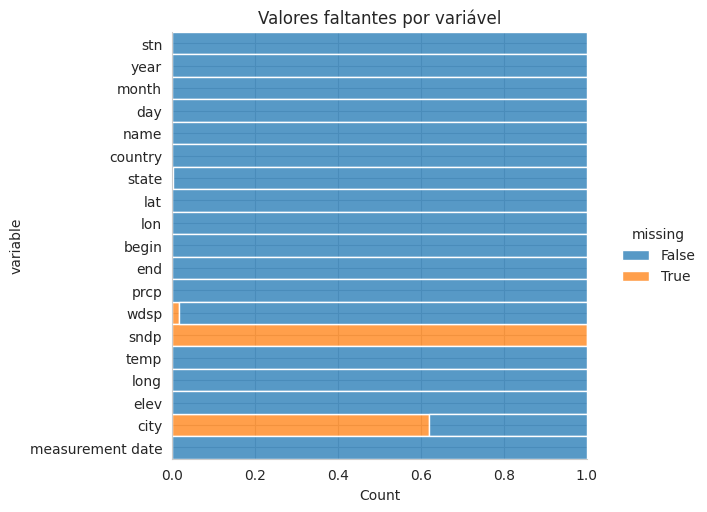

In [46]:
sns.set_style("whitegrid")

p = sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

p.fig.set_dpi(100)

plt.title('Valores faltantes por variável')
plt.show()
p.savefig("data/3_PRE_PROCESSING_DATASET_GHCN_DAILY/plot_ghcn_daily_missing_values.png")

In [47]:
df.stb.missing()

,missing,total,percent
sndp,2360011,2360195,99.992204
city,1461769,2360195,61.934247
wdsp,41530,2360195,1.759600
state,4862,2360195,0.206000
stn,0,2360195,0.000000
end,0,2360195,0.000000
elev,0,2360195,0.000000
long,0,2360195,0.000000
temp,0,2360195,0.000000
prcp,0,2360195,0.000000


#### QUANTIDADE DE ESTAÇÕES DISTINTAS

In [48]:
count_state = df[name_column_location].nunique()
count_state

652

### DATASET GHCN - STATIONS

In [49]:
type_schema = {"name": "categorical",
               "state": "categorical",
               "city": "categorical"}

In [50]:
profile = ProfileReport(dataset_stations.reset_index(),
                        title="Profiling - GHCN - STATIONS",
                        type_schema=type_schema,
                        minimal=True)

In [51]:
profile.to_file("data/profilings/profiling_ghcn_daily_stations.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### ANALISANDO VALORES FALTANTES

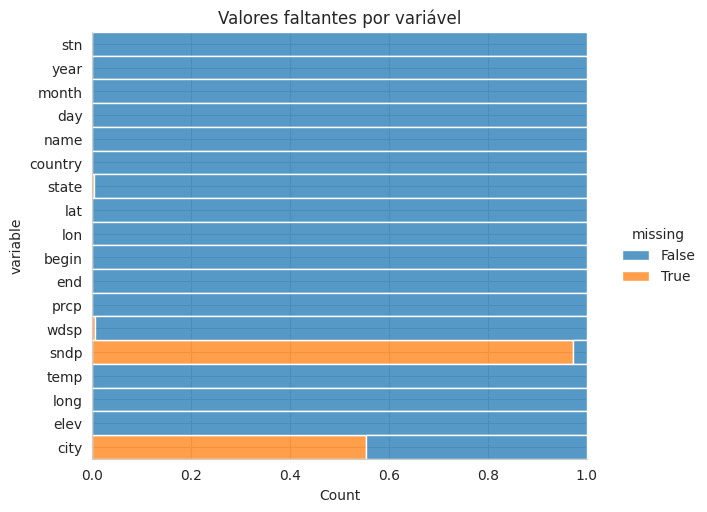

In [53]:
sns.set_style("whitegrid")

p = sns.displot(
    data=dataset_stations.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

p.fig.set_dpi(100)

plt.title('Valores faltantes por variável')
plt.show()
p.savefig("data/3_PRE_PROCESSING_DATASET_GHCN_DAILY/plot_ghcn_daily_stations_missing_values.png")

In [54]:
dataset_stations.stb.missing()

,missing,total,percent
sndp,154854,159372,97.165123
city,88255,159372,55.376729
wdsp,925,159372,0.580403
state,571,159372,0.358281
end,0,159372,0.000000
elev,0,159372,0.000000
long,0,159372,0.000000
temp,0,159372,0.000000
prcp,0,159372,0.000000
stn,0,159372,0.000000


#### QUANTIDADE DE ESTAÇÕES DISTINTAS

In [55]:
count_state = dataset_stations[name_column_location].nunique()
count_state

652

# EXPORTANDO DADOS

## DATASET CONTENDO O DATASET COM FREQUÊNCIA MENSAL

In [56]:
dataset_stations.to_excel("data/4_RESULTS_DATASET_GHCN_DAILY/dataset_ghcn_group_freq_daily.xlsx")